In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [ ]:
# Клинические данные

df_clinical = pd.read_csv('clinical.csv')
df_clinical.head()

,patient_id,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,ethnicity,overall_survival,status,overallsurvival
0,TCGA.CH.5753,70.0,0.9347,t3,n1,prostateadenocarcinomaacinartype,3.0,male,NaN,r0,white,nothispanicorlatino,31.0,0.0,"31,0"
1,TCGA.CH.5763,66.0,0.8600,t3,n0,prostateadenocarcinomaacinartype,0.0,male,no,r0,white,nothispanicorlatino,365.0,0.0,"365,0"
2,TCGA.CH.5764,66.0,0.9119,t3,n0,prostateadenocarcinomaacinartype,0.0,male,NaN,r0,white,nothispanicorlatino,31.0,0.0,"31,0"
3,TCGA.CH.5772,63.0,0.9071,t3,n0,prostateadenocarcinomaacinartype,0.0,male,yes,r1,white,nothispanicorlatino,486.0,0.0,"486,0"
4,TCGA.CH.5790,64.0,0.9490,t2,n0,prostateadenocarcinomaacinartype,0.0,male,no,r0,white,nothispanicorlatino,974.0,0.0,"974,0"


In [ ]:
df_clinical= df_clinical.drop(['race', 'ethnicity', 'gender','status', 'overallsurvival'], axis=1)
df_clinical.head()

,patient_id,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,radiation_therapy,residual_tumor,overall_survival
0,TCGA.CH.5753,70.0,0.9347,t3,n1,prostateadenocarcinomaacinartype,3.0,NaN,r0,31.0
1,TCGA.CH.5763,66.0,0.8600,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,365.0
2,TCGA.CH.5764,66.0,0.9119,t3,n0,prostateadenocarcinomaacinartype,0.0,NaN,r0,31.0
3,TCGA.CH.5772,63.0,0.9071,t3,n0,prostateadenocarcinomaacinartype,0.0,yes,r1,486.0
4,TCGA.CH.5790,64.0,0.9490,t2,n0,prostateadenocarcinomaacinartype,0.0,no,r0,974.0


In [ ]:
df_clinical = df_clinical.fillna(df_clinical.mode().iloc[0])

In [ ]:
df_clinical.head()

,patient_id,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,radiation_therapy,residual_tumor,overall_survival
0,TCGA.CH.5753,70.0,0.9347,t3,n1,prostateadenocarcinomaacinartype,3.0,no,r0,31.0
1,TCGA.CH.5763,66.0,0.8600,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,365.0
2,TCGA.CH.5764,66.0,0.9119,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,31.0
3,TCGA.CH.5772,63.0,0.9071,t3,n0,prostateadenocarcinomaacinartype,0.0,yes,r1,486.0
4,TCGA.CH.5790,64.0,0.9490,t2,n0,prostateadenocarcinomaacinartype,0.0,no,r0,974.0


In [ ]:
df_clinical = pd.read_csv('pure_clinical.csv')
df_clinical.head()

,Unnamed: 0,patient_id,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,radiation_therapy,residual_tumor,overall_survival,overallsurvival
0,0,TCGA.CH.5753,70.0,0.9347,t3,n1,prostateadenocarcinomaacinartype,3.0,no,r0,31.0,31
1,1,TCGA.CH.5763,66.0,0.8600,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,365.0,365
2,2,TCGA.CH.5764,66.0,0.9119,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,31.0,31
3,3,TCGA.CH.5772,63.0,0.9071,t3,n0,prostateadenocarcinomaacinartype,0.0,yes,r1,486.0,486
4,4,TCGA.CH.5790,64.0,0.9490,t2,n0,prostateadenocarcinomaacinartype,0.0,no,r0,974.0,974


<ipython-input-110-62340d303374>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


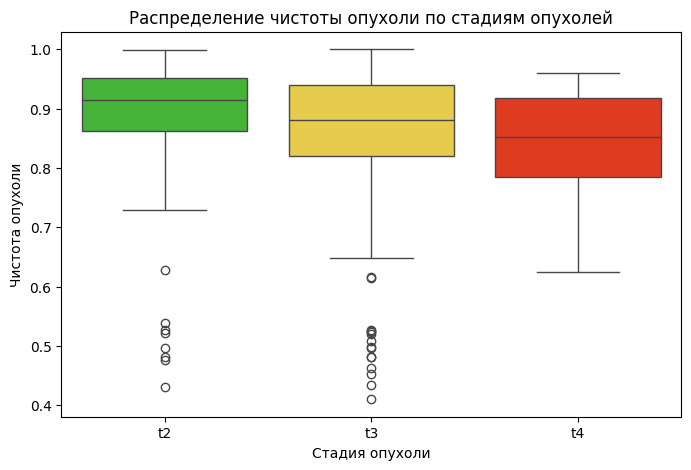

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="pathology_T_stage",  # Используем правильное название
    y="Tumor_purity",
    data=df_clinical,
    order=["t2", "t3", "t4"],
    palette=["#34C924", "#FFDC33", "#FF2400"]
)
plt.title("Распределение чистоты опухоли по стадиям опухолей")
plt.xlabel("Стадия опухоли")
plt.ylabel("Чистота опухоли")
plt.show()

<ipython-input-112-bab31bc8ca53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


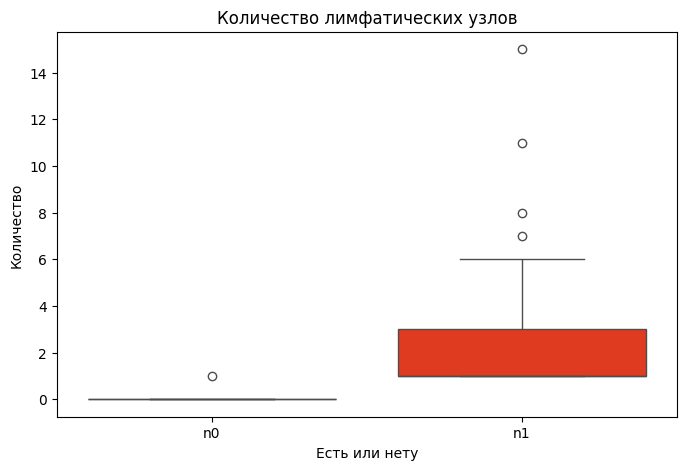

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="pathology_N_stage",
    y="number_of_lymph_nodes",
    data=df_clinical,
    order=["n0", "n1"],
    palette=["#FFDC33", "#FF2400"]
)
plt.title("Количество лимфатических узлов")
plt.xlabel("Есть или нету")
plt.ylabel("Количество")
plt.show()

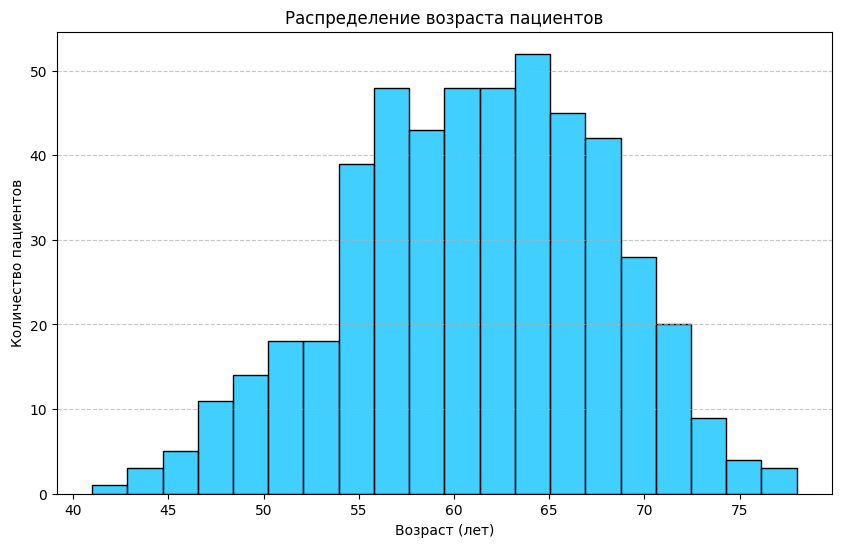

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_clinical,
    x="years_to_birth",
    bins=20,
    kde=False,
    color="#00BFFF"
)

plt.title("Распределение возраста пациентов")
plt.xlabel("Возраст (лет)")
plt.ylabel("Количество пациентов")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=f2083d6b2b957b269e5083a97fe22ca37a3a621ac5835001853fecbf02f3323f
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


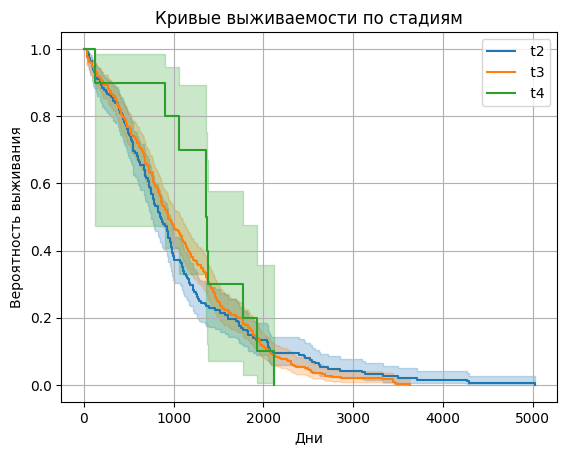

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
for stage in sorted(df_clinical['pathology_T_stage'].unique()):
    mask = df_clinical['pathology_T_stage'] == stage
    kmf.fit(df_clinical.loc[mask, 'overall_survival'], label=f' {stage}')
    kmf.plot_survival_function()

plt.title('Кривые выживаемости по стадиям')
plt.xlabel('Дни')
plt.ylabel('Вероятность выживания')
plt.grid()
plt.show()

In [ ]:
df_clinical.to_csv("pure_clinical.csv", index=True)



---



Обработка данные микроРНК

In [ ]:
# МикроРНК данные

df_mirna = pd.read_csv('mirna.csv')
df_mirna.head()

,attrib_name,TCGA.2A.A8VL,TCGA.2A.A8VO,TCGA.2A.A8VT,TCGA.2A.A8VV,TCGA.2A.A8VX,TCGA.2A.A8W1,TCGA.2A.A8W3,TCGA.2A.AAYF,TCGA.2A.AAYO,...,TCGA.ZG.A9LN,TCGA.ZG.A9LS,TCGA.ZG.A9LU,TCGA.ZG.A9LY,TCGA.ZG.A9LZ,TCGA.ZG.A9M4,TCGA.ZG.A9MC,TCGA.ZG.A9N3,TCGA.ZG.A9ND,TCGA.ZG.A9NI
0,hsa-let-7a-1,12.8338,12.5214,13.8688,13.5345,13.0709,12.7865,12.7580,12.8664,12.3853,...,12.7196,12.1542,12.6170,12.0258,12.4178,13.4111,12.4678,11.9477,13.2082,12.3981
1,hsa-let-7a-2,13.8371,13.5094,14.8641,14.5199,14.0424,13.7563,13.7657,13.8504,13.3905,...,13.7165,13.1402,13.6256,13.0134,13.4166,14.3997,13.4625,12.9549,14.1920,13.3805
2,hsa-let-7a-3,12.8425,12.5258,13.8875,13.5249,13.0449,12.7676,12.7648,12.8561,12.4060,...,12.7161,12.1562,12.6188,12.0217,12.4118,13.4034,12.4741,11.9584,13.1931,12.4046
3,hsa-let-7b,13.9082,12.5046,13.6256,13.4420,12.9682,11.8543,12.3813,12.8895,12.4143,...,12.1368,12.2891,13.0107,11.6730,12.6171,13.9535,12.3586,12.4178,13.2896,12.6286
4,hsa-let-7c,13.2434,12.7377,12.2766,12.7556,12.1261,12.6738,12.2470,12.5938,12.5486,...,13.0155,12.2108,11.9795,11.1191,11.4552,12.1271,12.1026,11.1577,12.6468,12.6875


In [ ]:
df_mirna = df_mirna.rename(columns={'attrib_name': 'patient_id'})

In [ ]:
df_mirna.head()

,patient_id,TCGA.2A.A8VL,TCGA.2A.A8VO,TCGA.2A.A8VT,TCGA.2A.A8VV,TCGA.2A.A8VX,TCGA.2A.A8W1,TCGA.2A.A8W3,TCGA.2A.AAYF,TCGA.2A.AAYO,...,TCGA.ZG.A9LN,TCGA.ZG.A9LS,TCGA.ZG.A9LU,TCGA.ZG.A9LY,TCGA.ZG.A9LZ,TCGA.ZG.A9M4,TCGA.ZG.A9MC,TCGA.ZG.A9N3,TCGA.ZG.A9ND,TCGA.ZG.A9NI
0,hsa-let-7a-1,12.8338,12.5214,13.8688,13.5345,13.0709,12.7865,12.7580,12.8664,12.3853,...,12.7196,12.1542,12.6170,12.0258,12.4178,13.4111,12.4678,11.9477,13.2082,12.3981
1,hsa-let-7a-2,13.8371,13.5094,14.8641,14.5199,14.0424,13.7563,13.7657,13.8504,13.3905,...,13.7165,13.1402,13.6256,13.0134,13.4166,14.3997,13.4625,12.9549,14.1920,13.3805
2,hsa-let-7a-3,12.8425,12.5258,13.8875,13.5249,13.0449,12.7676,12.7648,12.8561,12.4060,...,12.7161,12.1562,12.6188,12.0217,12.4118,13.4034,12.4741,11.9584,13.1931,12.4046
3,hsa-let-7b,13.9082,12.5046,13.6256,13.4420,12.9682,11.8543,12.3813,12.8895,12.4143,...,12.1368,12.2891,13.0107,11.6730,12.6171,13.9535,12.3586,12.4178,13.2896,12.6286
4,hsa-let-7c,13.2434,12.7377,12.2766,12.7556,12.1261,12.6738,12.2470,12.5938,12.5486,...,13.0155,12.2108,11.9795,11.1191,11.4552,12.1271,12.1026,11.1577,12.6468,12.6875


In [ ]:
df_mirna= df_mirna.transpose()

In [ ]:
df_mirna.head()

,0,1,2,3,4,5,6,7,8,9,...,755,756,757,758,759,760,761,762,763,764
patient_id,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA.2A.A8VL,12.8338,13.8371,12.8425,13.9082,13.2434,8.3536,9.6784,4.0061,12.6053,8.4327,...,0.5359,0.0,0.7439,0.0,1.5965,1.2323,5.2263,4.7232,11.1016,14.16
TCGA.2A.A8VO,12.5214,13.5094,12.5258,12.5046,12.7377,8.1872,9.1019,3.6809,12.9862,9.0234,...,0.6838,0.0,2.1161,0.0,0.0,0.9333,5.0766,5.0238,11.0736,13.3895
TCGA.2A.A8VT,13.8688,14.8641,13.8875,13.6256,12.2766,8.5784,10.1372,4.8769,13.9018,9.0559,...,0.7662,0.0,1.264,0.0,1.7878,1.0365,4.1835,5.573,10.9068,14.1987
TCGA.2A.A8VV,13.5345,14.5199,13.5249,13.442,12.7556,7.7754,10.4548,4.3254,13.6606,8.5851,...,0.4657,0.0,1.2224,0.0,0.8171,0.6521,4.7292,4.8861,11.1791,13.6119


In [ ]:
df_mirna.to_csv("pure_mirna.csv", index=True)

In [ ]:
df_mirna = pd.read_csv('pure_mirna.csv')
df_mirna = pd.merge(df_clinical, df_mirna, on='patient_id', how='inner')

In [ ]:
df_mirna.to_csv("merged_clinical_mirna.csv", index=True)

In [ ]:
df_merged_mirna = pd.read_csv('merged_clinical_mirna.csv')
df_merged_mirna.head()

,Unnamed: 0,patient_id,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,radiation_therapy,residual_tumor,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,0,TCGA.CH.5753,70.0,0.9347,t3,n1,prostateadenocarcinomaacinartype,3.0,no,r0,...,0.7837,0.0,1.1392,0.0,1.9584,0.7837,5.2311,4.6743,9.8403,13.6252
1,1,TCGA.CH.5763,66.0,0.8600,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,...,0.1638,0.0,0.7835,0.0,2.0447,0.5665,3.1201,4.8940,10.7275,14.0089
2,2,TCGA.CH.5764,66.0,0.9119,t3,n0,prostateadenocarcinomaacinartype,0.0,no,r0,...,1.0950,0.0,0.9810,0.0,1.6369,0.5723,4.2614,4.6071,10.3215,13.9543
3,3,TCGA.CH.5772,63.0,0.9071,t3,n0,prostateadenocarcinomaacinartype,0.0,yes,r1,...,0.7658,0.0,0.5238,0.0,0.3364,1.0963,4.1258,5.3203,11.0670,13.6686
4,4,TCGA.CH.5790,64.0,0.9490,t2,n0,prostateadenocarcinomaacinartype,0.0,no,r0,...,0.4072,0.0,1.5639,0.0,1.3953,0.7244,5.0985,5.0425,10.3317,13.4796


In [ ]:
df_merged_mirna.columns

Index(['Unnamed: 0', 'patient_id', 'years_to_birth', 'Tumor_purity',
       'pathology_T_stage', 'pathology_N_stage', 'histological_type',
       'number_of_lymph_nodes', 'radiation_therapy', 'residual_tumor',
       ...
       'hsa-mir-940', 'hsa-mir-941-1', 'hsa-mir-942', 'hsa-mir-943',
       'hsa-mir-944', 'hsa-mir-95', 'hsa-mir-96', 'hsa-mir-98', 'hsa-mir-99a',
       'hsa-mir-99b'],
      dtype='object', length=776)

In [ ]:
mirna_cols = [col for col in df_merged_mirna.columns if col.startswith('hsa-')]
mirna_variability = df_merged_mirna[mirna_cols].std(axis=0).sort_values(ascending=False)

In [ ]:
top_10_mirna = mirna_variability.head(10).index.tolist()

In [ ]:
X = df_merged_mirna[top_10_mirna].apply(pd.to_numeric, errors='coerce')
mask = X.notna().all(axis=1)
X = X[mask].copy()

# Создание пустой матрицы для p-значений
p_matrix = pd.DataFrame(np.zeros((len(top_10_mirna), len(top_10_mirna))),
                        index=top_10_mirna, columns=top_10_mirna)

In [ ]:
# Заполнение матрицы p-значений
for miR1 in top_10_mirna:
    for miR2 in top_10_mirna:
        _, p_val = pearsonr(X[miR1], X[miR2])
        p_matrix.loc[miR1, miR2] = p_val

# Вывод матрицы
print("Матрица p-значений корреляции Пирсона для топ-10 miRNA:")
print(p_matrix)

Матрица p-значений корреляции Пирсона для топ-10 miRNA:
               hsa-mir-206  hsa-mir-1269   hsa-mir-205  hsa-mir-210  \
hsa-mir-206   0.000000e+00      0.015662  4.186787e-13     0.184887   
hsa-mir-1269  1.566231e-02      0.000000  4.330378e-02     0.713706   
hsa-mir-205   4.186787e-13      0.043304  0.000000e+00     0.225724   
hsa-mir-210   1.848875e-01      0.713706  2.257242e-01     0.000000   
hsa-mir-429   1.132546e-10      0.035778  2.486176e-07     0.014183   
hsa-mir-9-2   7.763805e-05      0.014735  6.018946e-03     0.093605   
hsa-mir-9-1   7.965976e-05      0.016755  7.152408e-03     0.092367   
hsa-mir-200b  2.400295e-10      0.005837  1.508667e-11     0.024566   
hsa-mir-200a  1.079718e-10      0.004811  6.610732e-10     0.005978   
hsa-mir-187   2.161749e-09      0.065908  1.717222e-01     0.145154   

                hsa-mir-429  hsa-mir-9-2  hsa-mir-9-1   hsa-mir-200b  \
hsa-mir-206    1.132546e-10     0.000078     0.000080   2.400295e-10   
hsa-mir-1269   3.5

<ipython-input-151-b73f2be47462>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


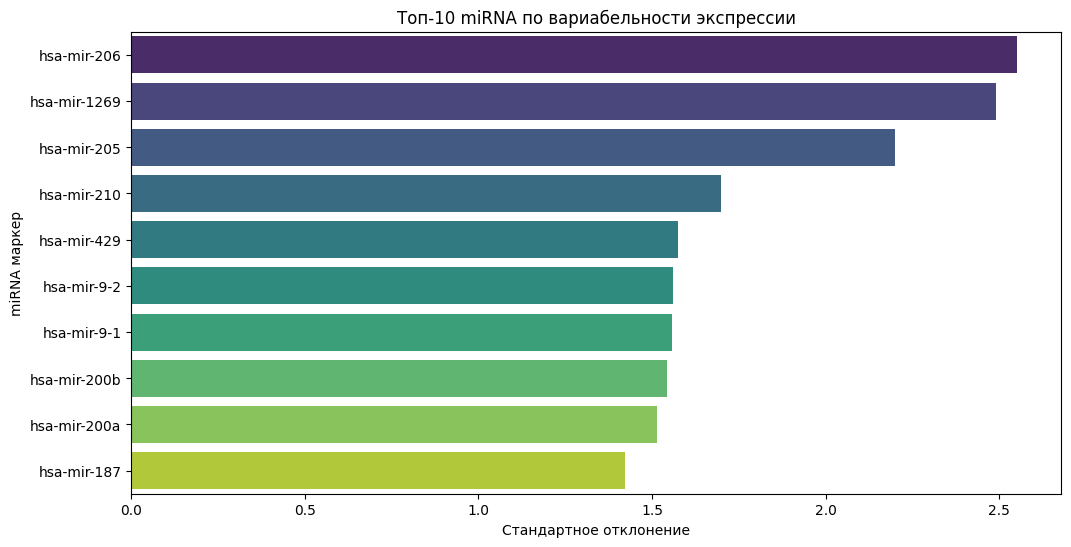

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=mirna_variability.head(10).values,
    y=mirna_variability.head(10).index,
    palette="viridis"
)
plt.title('Топ-10 miRNA по вариабельности экспрессии')
plt.xlabel('Стандартное отклонение')
plt.ylabel('miRNA маркер')
plt.show()

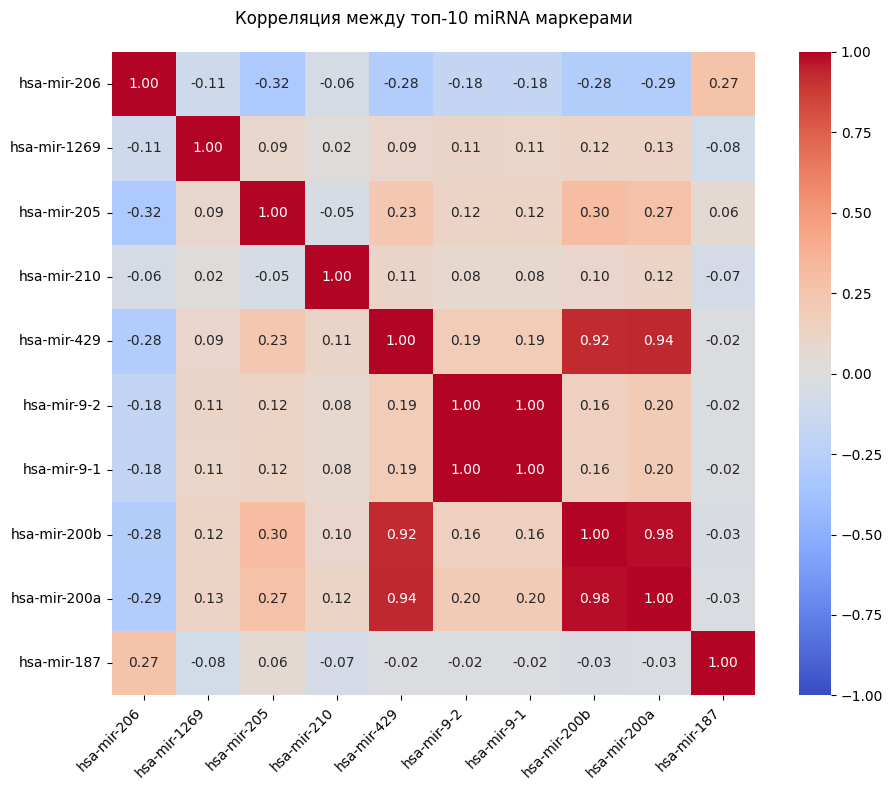

In [ ]:
# Вычисляем корреляционную матрицу для топ-10 miRNA
corr_matrix = df_merged_mirna[top_10_mirna].corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot=True,  # Показываем значения в ячейках
    fmt=".2f",   # Формат чисел (2 знака после запятой)
    square=True  # Квадратные ячейки
)

plt.title('Корреляция между топ-10 miRNA маркерами', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



---



ML-машинное обучение



Random Forest с GridSearch

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# 1. Признаки miRNA
mirna_cols = [col for col in df_merged_mirna.columns if col.startswith('hsa-')]
X = df_merged_mirna[mirna_cols]

# 2. Целевая переменная: t2 = 0, t3/t4 = 1
y = df_merged_mirna['pathology_T_stage'].str.lower().map(lambda x: 0 if x == 't2' else 1 if x in ['t3', 't4'] else None)

# 3. Удалим строки с пропусками
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

In [ ]:
# 4. Отбор признаков с высокой дисперсией
high_variance_cols = X.var()[X.var() > X.var().quantile(0.25)].index
X = X[high_variance_cols]

# 5. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 7. Балансировка
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# 8. Random Forest с GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}
clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                   param_grid, cv=3, scoring='f1', n_jobs=-1)
clf.fit(X_resampled, y_resampled)

best_model = clf.best_estimator_


In [ ]:
# 9. Оценка
y_pred = best_model.predict(X_test)
print("Лучшая модель:", clf.best_params_)
print("\nОтчет:")
print(classification_report(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Лучшая модель: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Отчет:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        37
           1       0.81      0.92      0.86        62

    accuracy                           0.82        99
   macro avg       0.82      0.78      0.80        99
weighted avg       0.82      0.82      0.81        99

Матрица ошибок:
[[24 13]
 [ 5 57]]


In [ ]:
# 10. Важность признаков
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'miRNA': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nТоп-10 miRNA по важности:")
print(importance_df.head(10))


Топ-10 miRNA по важности:
              miRNA  importance
222     hsa-mir-30a    0.014545
316    hsa-mir-3676    0.011397
372     hsa-mir-425    0.010137
496     hsa-mir-592    0.010132
175      hsa-mir-21    0.009847
87   hsa-mir-133a-1    0.009278
354  hsa-mir-3926-1    0.008409
187     hsa-mir-217    0.008321
552    hsa-mir-891a    0.008215
105    hsa-mir-1468    0.008102


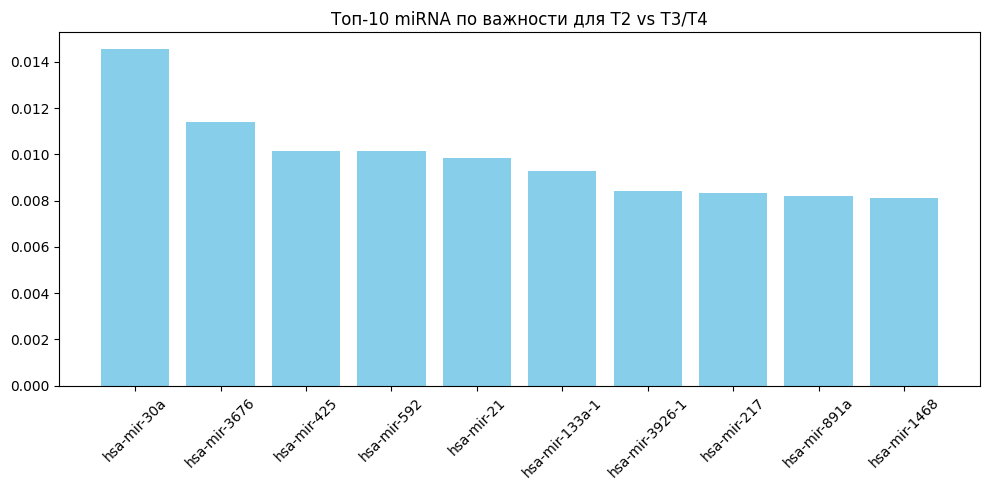

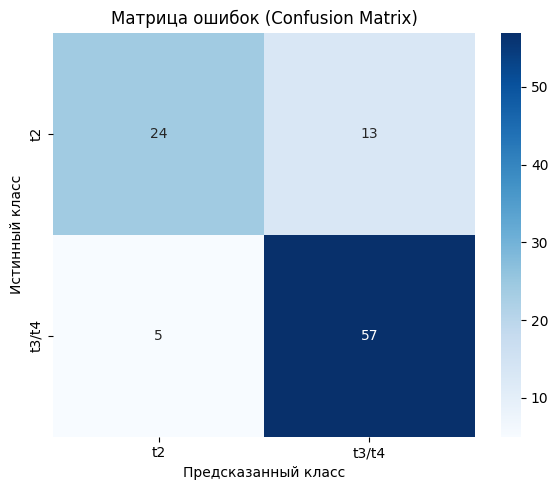

In [ ]:
# 11. Визуализация
plt.figure(figsize=(10, 5))
plt.bar(importance_df.head(10)['miRNA'], importance_df.head(10)['importance'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Топ-10 miRNA по важности для T2 vs T3/T4")
plt.tight_layout()
plt.show()

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['t2', 't3/t4'], yticklabels=['t2', 't3/t4'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.tight_layout()
plt.show()



---





XGBoost с GridSearch

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# 1. Признаки miRNA
mirna_cols = [col for col in df_merged_mirna.columns if col.startswith('hsa-')]
X = df_merged_mirna[mirna_cols]

# Проверка и преобразование miRNA-столбцов в числовой формат
X = X.apply(pd.to_numeric, errors='coerce')

# 2. Целевая переменная: t2 = 0, t3/t4 = 1
y = df_merged_mirna['pathology_T_stage'].str.lower().map(lambda x: 0 if x == 't2' else 1 if x in ['t3', 't4'] else None)

In [ ]:
# 3. Удаление строк с пропусками
mask = X.notna().all(axis=1) & y.notna()
X = X[mask].copy()
y = y[mask].copy()

# 4. Отбор признаков с высокой дисперсией
high_variance_cols = X.var()[X.var() > X.var().quantile(0.25)].index
X = X[high_variance_cols]

In [ ]:
# 5. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 6. Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 7. Балансировка
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# 8. XGBoost с GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]  # Для дисбаланса
}
clf = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid, cv=3, scoring='f1', n_jobs=-1
)
clf.fit(X_resampled, y_resampled)

best_model = clf.best_estimator_

In [ ]:
# 9. Оценка
y_pred = best_model.predict(X_test)
print("Лучшая модель:", clf.best_params_)
print("\nОтчет:")
print(classification_report(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Лучшая модель: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 15, 'scale_pos_weight': 1}

Отчет:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        37
           1       0.81      0.84      0.83        62

    accuracy                           0.78        99
   macro avg       0.76      0.76      0.76        99
weighted avg       0.78      0.78      0.78        99

Матрица ошибок:
[[25 12]
 [10 52]]


In [ ]:
# 10. Важность признаков
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'miRNA': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nТоп-10 miRNA по важности:")
print(importance_df.head(10))


Топ-10 miRNA по важности:
             miRNA  importance
35     hsa-mir-486         167
38     hsa-mir-508         158
26    hsa-mir-24-2         155
17    hsa-mir-1976         154
22     hsa-mir-217         133
6    hsa-mir-1274b         131
45     hsa-mir-653         122
10  hsa-mir-135a-1         119
29     hsa-mir-30e         101
49      hsa-mir-98          98


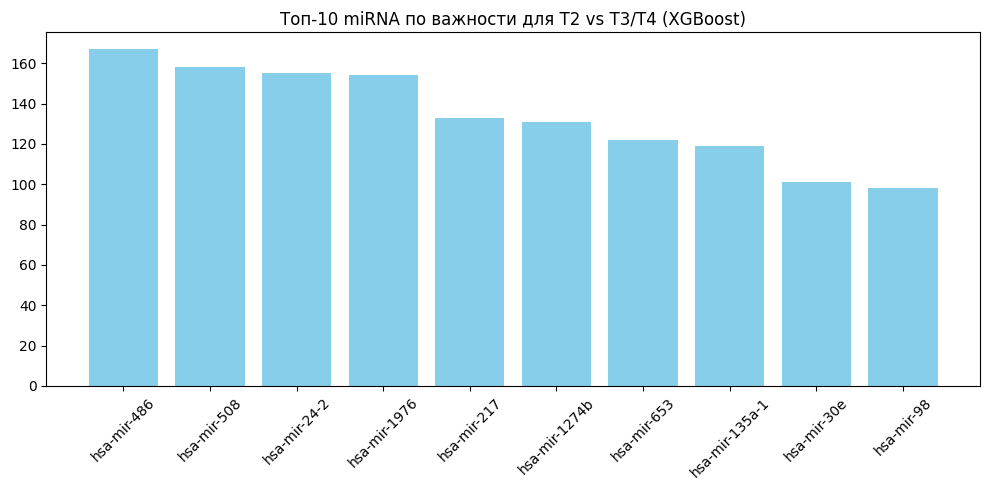

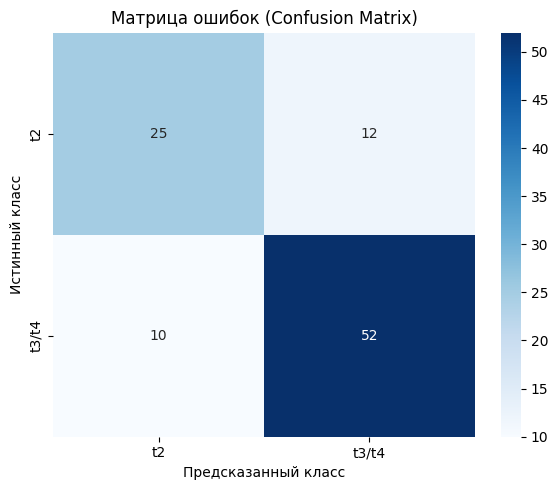

In [ ]:
# 11. Визуализация
plt.figure(figsize=(10, 5))
plt.bar(importance_df.head(10)['miRNA'], importance_df.head(10)['importance'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Топ-10 miRNA по важности для T2 vs T3/T4 (XGBoost)")
plt.tight_layout()
plt.show()

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['t2', 't3/t4'], yticklabels=['t2', 't3/t4'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.tight_layout()
plt.show()



---



LightGBM с GridSearch

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# 1. Признаки miRNA
mirna_cols = [col for col in df_merged_mirna.columns if col.startswith('hsa-')]
X = df_merged_mirna[mirna_cols]

# Преобразование в числовой формат
X = X.apply(pd.to_numeric, errors='coerce')

# 2. Целевая переменная: t2 = 0, t3/t4 = 1
y = df_merged_mirna['pathology_T_stage'].str.lower().map(lambda x: 0 if x == 't2' else 1 if x in ['t3', 't4'] else None)

In [ ]:
# 3. Удаление строк с пропусками
mask = X.notna().all(axis=1) & y.notna()
X = X[mask].copy()
y = y[mask].copy()

# 4. Отбор признаков с помощью SelectKBest
selector = SelectKBest(score_func=f_classif, k=50)  # Топ-50 признаков
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = pd.DataFrame(X_selected, columns=selected_features, index=X.index)

In [ ]:
# 5. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 6. Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 7. Балансировка
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Меньше синтетических примеров
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# 8. LightGBM с GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}
clf = GridSearchCV(
    LGBMClassifier(random_state=42, verbosity=-1),
    param_grid, cv=3, scoring='f1', n_jobs=-1
)
clf.fit(X_resampled, y_resampled)

best_model = clf.best_estimator_

In [ ]:
# 9. Оценка с настройкой порога
y_prob = best_model.predict_proba(X_test)[:, 1]
threshold = 0.4  # Настройка порога для улучшения recall класса 0
y_pred = (y_prob >= threshold).astype(int)

print("Лучшая модель:", clf.best_params_)
print("\nОтчет:")
print(classification_report(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

# PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Лучшая модель: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 15, 'scale_pos_weight': 1}

Отчет:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        37
           1       0.80      0.89      0.84        62

    accuracy                           0.79        99
   macro avg       0.78      0.75      0.76        99
weighted avg       0.79      0.79      0.78        99

Матрица ошибок:
[[23 14]
 [ 7 55]]
PR-AUC: 0.8711234628720003


In [ ]:
# 10. Важность признаков
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'miRNA': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nТоп-10 miRNA по важности:")
print(importance_df.head(10))


Топ-10 miRNA по важности:
             miRNA  importance
35     hsa-mir-486         167
38     hsa-mir-508         158
26    hsa-mir-24-2         155
17    hsa-mir-1976         154
22     hsa-mir-217         133
6    hsa-mir-1274b         131
45     hsa-mir-653         122
10  hsa-mir-135a-1         119
29     hsa-mir-30e         101
49      hsa-mir-98          98


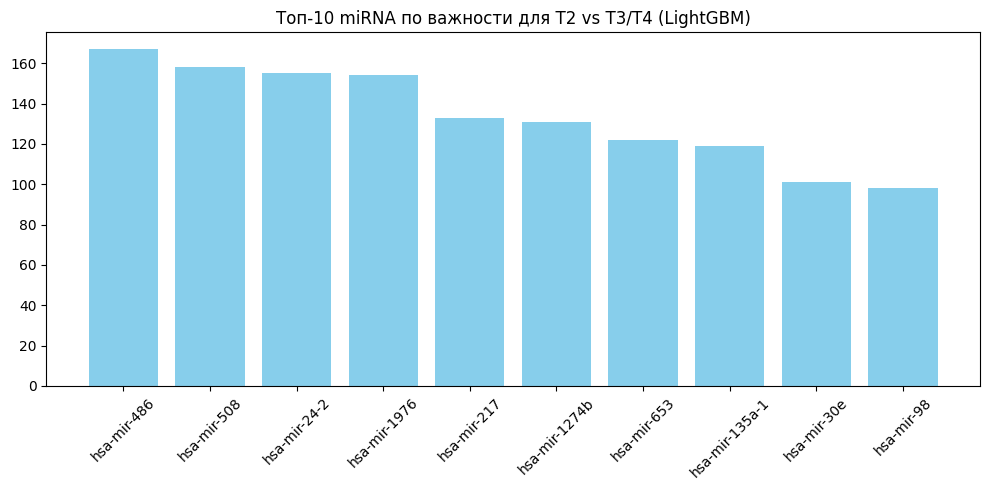

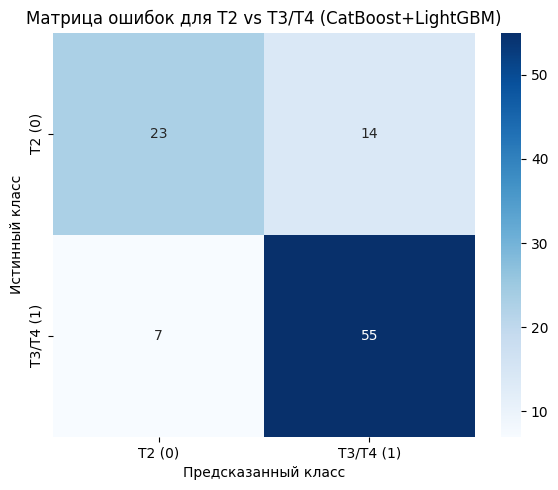

In [ ]:
# 11. Визуализация
plt.figure(figsize=(10, 5))
plt.bar(importance_df.head(10)['miRNA'], importance_df.head(10)['importance'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Топ-10 miRNA по важности для T2 vs T3/T4 (LightGBM)")
plt.tight_layout()
plt.show()

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['T2 (0)', 'T3/T4 (1)'],
            yticklabels=['T2 (0)', 'T3/T4 (1)'])
plt.title('Матрица ошибок для T2 vs T3/T4 (CatBoost+LightGBM)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()